In [0]:
# pandas for handling our dataset
import pandas as pd
# numpy for numeric operations
import numpy as np
from collections import defaultdict

# matplotlib for plotting
import matplotlib.pyplot as plt
# use ggplot style
plt.style.use('ggplot')
# seaborn for beautiful visualizations
import seaborn as sns
# regualar expression
import re
# print inline in this notebook
%matplotlib inline

In [11]:
import pandas as pd
# read the data set using pandas .read_csv() method
url = 'https://raw.githubusercontent.com/PMS22/DMBI_Project/master/amazon_jobs_dataset.csv'
df_job_description = pd.read_csv(url)
# print the top 5 row from the dataframe
df_job_description.head()

,Unnamed: 0,Title,location,Posting_date,DESCRIPTION,BASIC QUALIFICATIONS,PREFERRED QUALIFICATIONS
0,0,Software Development Manager,"US, WA, Seattle","March 1, 2018",You are an experienced hands-on manager with a...,· Proven track record of hiring and managing h...,· Experience building extremely high volume an...
1,1,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
2,2,Software Development Engineer,"IN, KA, Bangalore","March 1, 2018",Amazon is driven by being “the world’s most cu...,· Bachelor’s Degree in Computer Science or rel...,· Experience building complex software systems...
3,3,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...
4,4,Software Development Engineer - Amazon Lex,"US, WA, Seattle","March 1, 2018",Have you ever wondered what it takes to build ...,· Bachelors Degree in Computer Science or a re...,· Masters or PhD in Computer Science· Experien...


In [0]:
#list of programming langauages and technologies
languages_list = ['swift','matlab','mongodb','hadoop','cosmos', 'mysql','spark', 'pig', 'python', 'java', 'c++', 'php', 'javascript', 'objectivec', 'ruby', 'perl','c','c#']

In [0]:
# get our BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns and and convert all of the values to a list
qualifications = df_job_description['BASIC QUALIFICATIONS'].tolist()+df_job_description['PREFERRED QUALIFICATIONS'].tolist()
# joining the list to a single string and lower case the letter
qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications).lower()

In [14]:
wordcount = dict((x,0) for x in languages_list)
for w in re.findall(r"[[\w'+#-]+|[.!?;’]", qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'swift': 56, 'matlab': 24, 'mongodb': 19, 'hadoop': 219, 'cosmos': 1, 'mysql': 74, 'spark': 148, 'pig': 13, 'python': 1187, 'java': 3065, 'c++': 1892, 'php': 60, 'javascript': 832, 'objectivec': 55, 'ruby': 570, 'perl': 529, 'c': 1010, 'c#': 991}


In [0]:
# sort the dict
programming_language_popularity = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [0]:
# make a new dataframe from programming languages and their popularity
df_popular_programming_lang = pd.DataFrame(programming_language_popularity,columns=['Language','Popularity'])
# Capitalize each programming language first letter
df_popular_programming_lang['Language'] = df_popular_programming_lang.Language.str.capitalize()
df_popular_programming_lang = df_popular_programming_lang[::-1]

In [17]:
df_popular_programming_lang

,Language,Popularity
17,Cosmos,1
16,Pig,13
15,Mongodb,19
14,Matlab,24
13,Objectivec,55
12,Swift,56
11,Php,60
10,Mysql,74
9,Spark,148
8,Hadoop,219


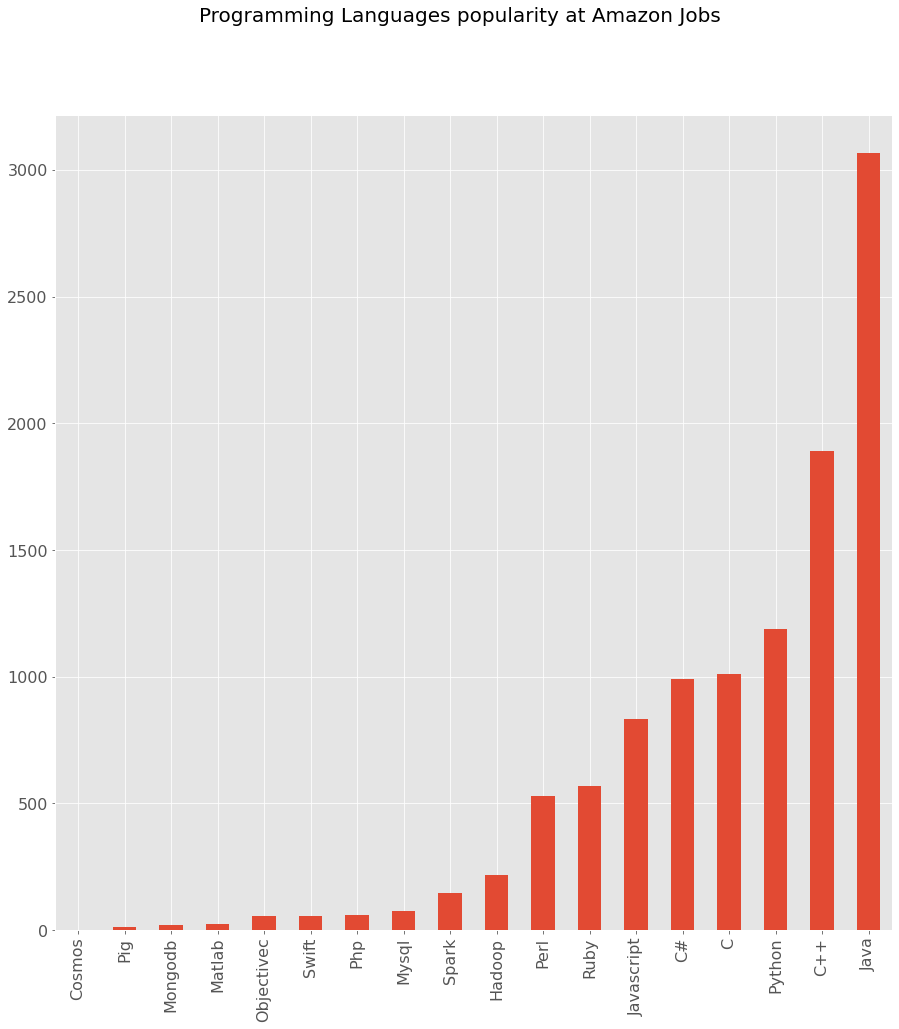

In [18]:
# plot
df_popular_programming_lang.plot.bar(x='Language',y='Popularity',figsize=(15,15), legend=False)
# add a suptitle
plt.suptitle("Programming Languages popularity at Amazon Jobs", fontsize=20)
# set xlabel to ""
plt.xlabel("")
# change xticks fontsize to 14
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
# finally show the plot
plt.show()

In [0]:
# get our BASIC QUALIFICATIONS and PREFERRED QUALIFICATIONS columns and and convert all of the values to a string

basic_qualifications_string = "".join(re.sub('[·,-/’()]', '', str(v)) for v in qualifications)

In [0]:
degree_list = ["BA", "BS", "Bachelor's", "PhD","MS","Master's"]

In [21]:
wordcount = dict((x,0) for x in degree_list)
for w in re.findall(r"[\w']+|[.,!?;’]", basic_qualifications_string):
    if w in wordcount:
        wordcount[w] += 1
# print
print(wordcount)

{'BA': 2, 'BS': 524, "Bachelor's": 947, 'PhD': 489, 'MS': 433, "Master's": 417}


In [0]:
degree_wanted = sorted(wordcount.items(), key=lambda kv: kv[1], reverse=True)

In [23]:
df_degree_popular = pd.DataFrame(degree_wanted,columns=['Degree','Popularity'])

df_degree_popular

,Degree,Popularity
0,Bachelor's,947
1,BS,524
2,PhD,489
3,MS,433
4,Master's,417
5,BA,2


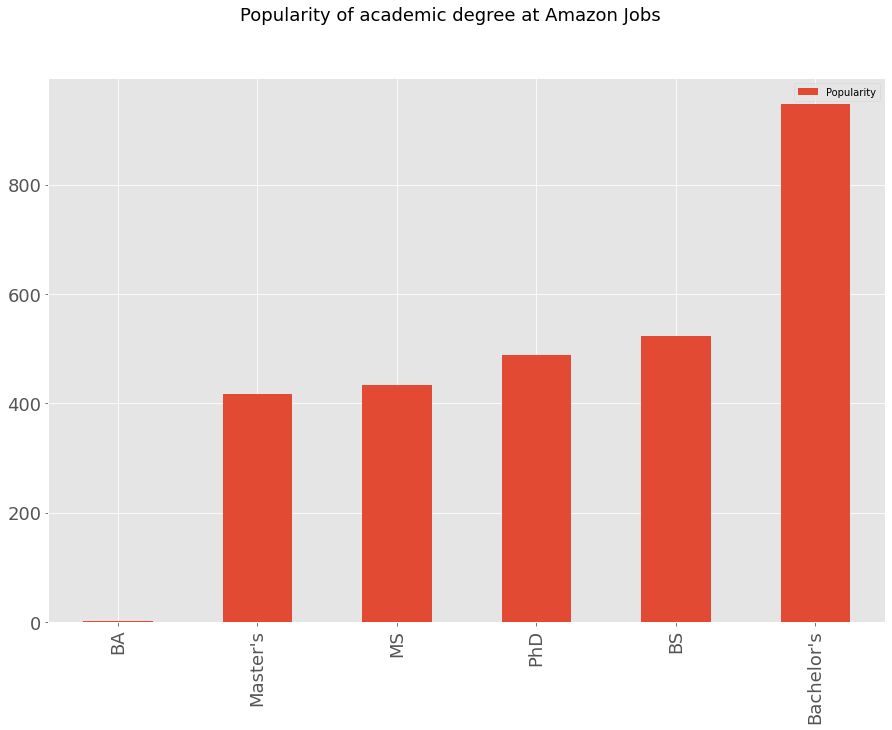

In [24]:
df_degree_popular = df_degree_popular[::-1] 
# plot
df_degree_popular.plot.bar(x='Degree',y='Popularity',figsize=(15,10), stacked=True)
# add a suptitle
plt.suptitle("Popularity of academic degree at Amazon Jobs ", fontsize=18)
# set xlabel to ""
plt.xlabel("")

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

In [25]:
years = defaultdict(lambda: 0)

for w in re.findall(r'([0-9]) ', basic_qualifications_string):
     years[w] += 1
        
print(years)

defaultdict(<function <lambda> at 0x7f5003adaf28>, {'5': 373, '3': 460, '6': 201, '8': 51, '7': 240, '1': 291, '2': 349, '4': 106, '0': 116, '9': 10})


In [0]:
years = sorted(years.items(), key=lambda kv: kv[1], reverse=True)

In [0]:
df_years = pd.DataFrame(years,columns=['Years of experience','Popularity'])
df_years = df_years[::-1]

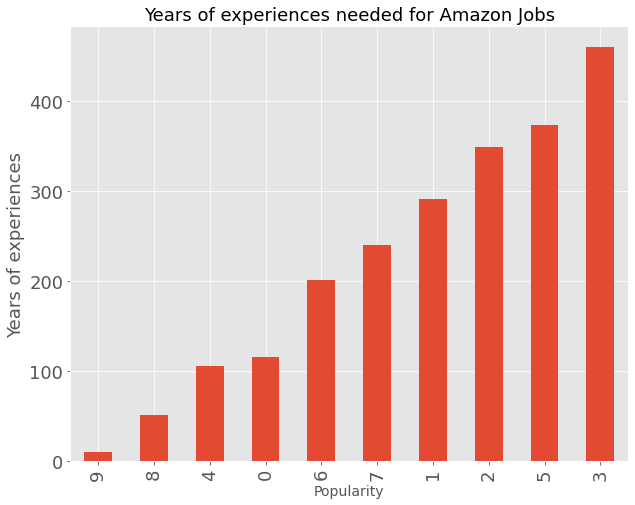

In [28]:
df_years.plot.bar(x='Years of experience',y='Popularity',figsize=(10, 8), legend=False,stacked=True)
# add a suptitle
plt.title("Years of experiences needed for Amazon Jobs", fontsize=18)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=14)
plt.ylabel("Years of experiences",fontsize=18)
# change xticks fontsize to 14
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
# finally show the plot
plt.show()

In [0]:
# where is most job located
threshold = 10
location_value_counts = df_job_description.location.value_counts()
to_remove = location_value_counts[location_value_counts <= threshold].index
df_job_description['location'].replace(to_remove, np.nan, inplace=True)
location_value_counts = df_job_description.location.value_counts()
location_value_counts = location_value_counts[::-1]

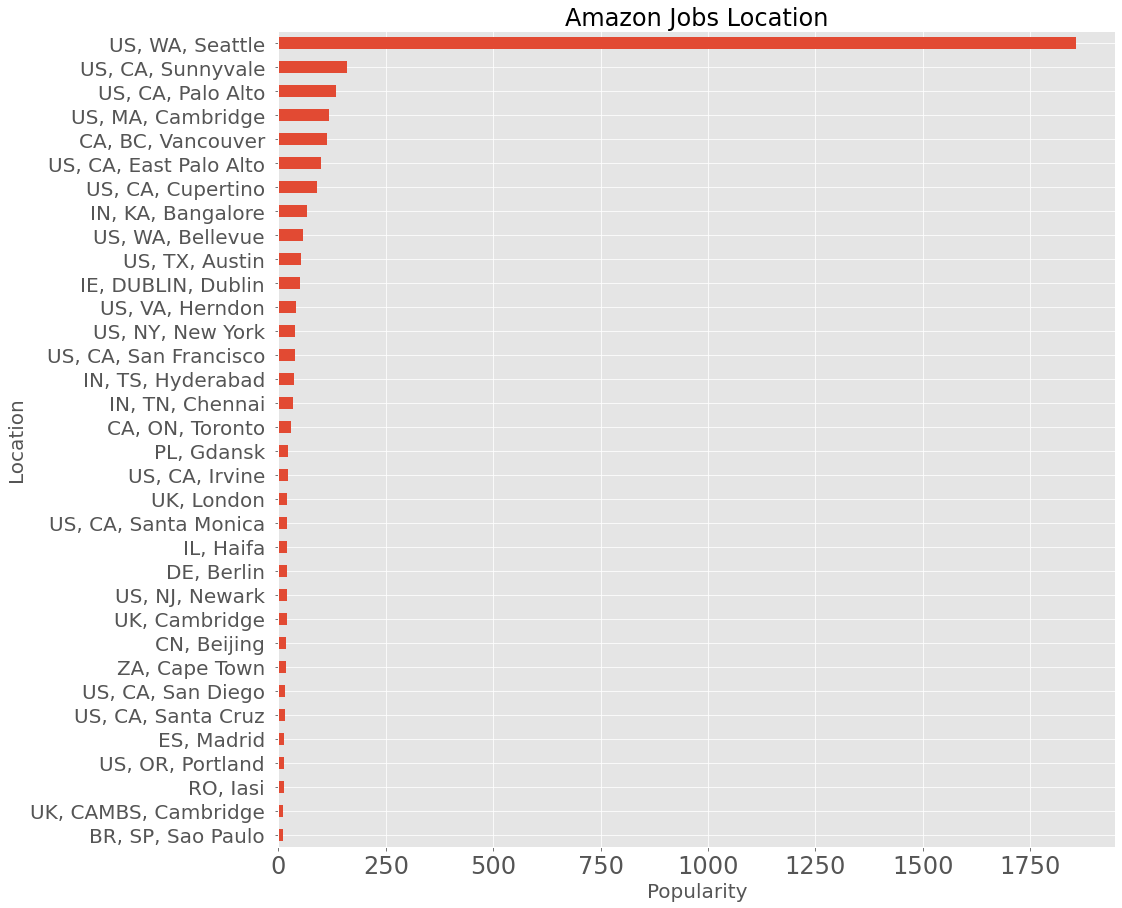

In [31]:
location_value_counts.plot.barh(figsize=(15, 15))
# add a suptitle
plt.title("Amazon Jobs Location", fontsize=24)
# set xlabel to ""
plt.xlabel("Popularity", fontsize=20)
plt.ylabel("Location",fontsize=20)
# change xticks fontsize to 14
plt.xticks(fontsize=24)
plt.yticks(fontsize=20)
# finally show the plot
plt.show()